### Librerias

In [1]:
import pydicom
import matplotlib.pyplot as plt
import numpy as np
import SimpleITK as sitk




#### plot imagenes

In [2]:
def read_3d_dcm_image(path, type_= 'other'):
    # Read the DICOM image
    ds = pydicom.dcmread(path)

    # Get the pixel data and image shape
    pixel_data = ds.pixel_array
    if type_ == 'us':
        pixel_data = pixel_data[:,:,:,0]
        
    
    print(pixel_data.shape)
    rows, cols, num_slices = pixel_data.shape
    

    # Print image type and shape
    print("Image type:", type(pixel_data))
    print("Image shape:", pixel_data.shape)

    # Return the data matrix as a NumPy array
    return np.array(pixel_data)


In [3]:
def load_imagen_path(path):
    archivos_dicom = [os.path.join(path, archivo) for archivo in os.listdir(path) if archivo.endswith('.dcm')]
    # Leer los archivos DICOM y almacenar los datos de imagen en una lista
    imagenes_dicom = []
    for archivo in archivos_dicom:
        ds = pydicom.dcmread(archivo)
        imagenes_dicom.append(ds.pixel_array)

    # Convertir la lista de imágenes DICOM en una imagen 3D
    imagen_3d = np.stack(imagenes_dicom, axis=-1)

    # Obtener las dimensiones de la imagen
    dim_x, dim_y, dim_z = imagen_3d.shape

    # Imprimir las dimensiones de la imagen
    print(f"Dimensiones de la imagen: {dim_x} x {dim_y} x {dim_z}")

    # Imprimir el tipo de datos de la imagen
    print(f"Tipo de datos de la imagen: {imagen_3d.dtype}")

    return imagen_3d


In [18]:
path = 'rm_data/series-00000/'
rm_imagen = load_imagen_path(path)
path = 'ct_data/series-00000/'
tc_imagen = load_imagen_path(path)
path =  'us_data/image-00003.dcm'
us_imagen = read_3d_dcm_image(path, type_ = 'us')

Dimensiones de la imagen: 512 x 512 x 28
Tipo de datos de la imagen: int16
Dimensiones de la imagen: 1595 x 888 x 2
Tipo de datos de la imagen: int16
(33, 434, 636)
Image type: <class 'numpy.ndarray'>
Image shape: (33, 434, 636)


In [19]:
def plot_3d_image(image):
    # Get the image dimensions
    x_dim, y_dim, z_dim = image.shape

    # Plot the original image
    fig, axs = plt.subplots(2, 2, figsize=(12, 12))
    axs[0, 0].imshow(image[int(x_dim/2), :,: ], cmap='gray')
    axs[0, 0].set_title("Original Image")

    # Plot the axial image
    axs[0, 1].imshow(image[:, :, int(z_dim / 2)], cmap='gray')
    axs[0, 1].set_title("Axial View")

    # Plot the coronal image
    axs[1, 0].imshow(image[:, int(y_dim / 2), :], cmap='gray')
    axs[1, 0].set_title("Coronal View")

    # Plot the sagittal image
    axs[1, 1].imshow(image[int(x_dim / 2), :, :].T, cmap='gray')
    axs[1, 1].set_title("Sagittal View")

    plt.show()

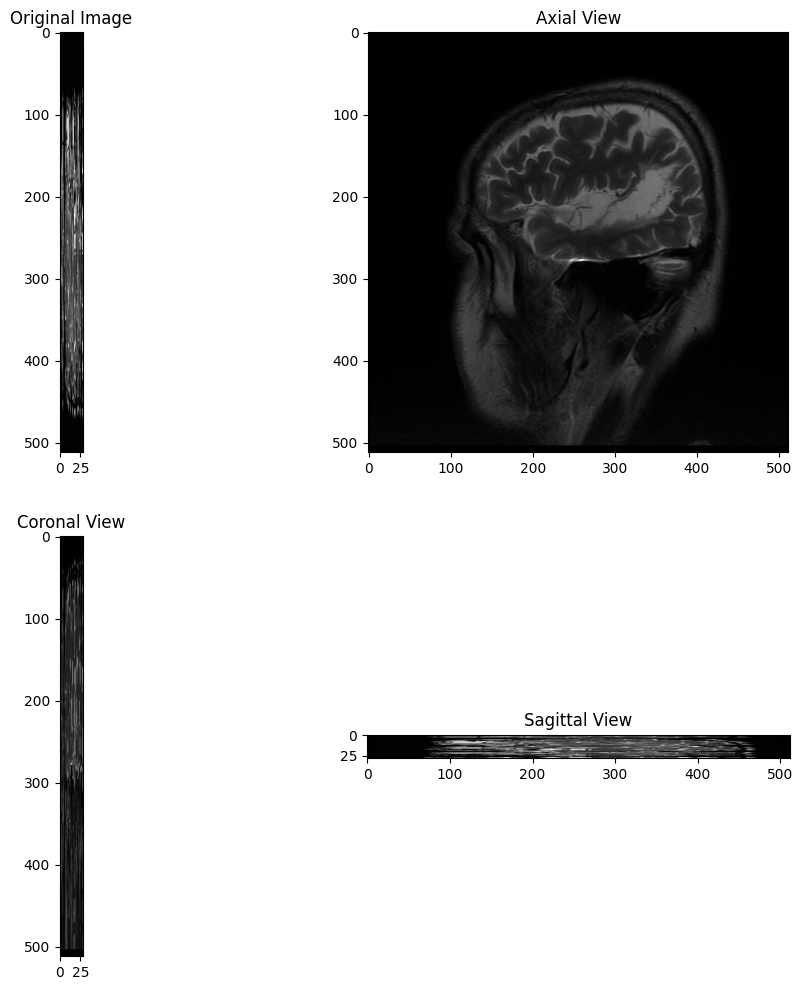

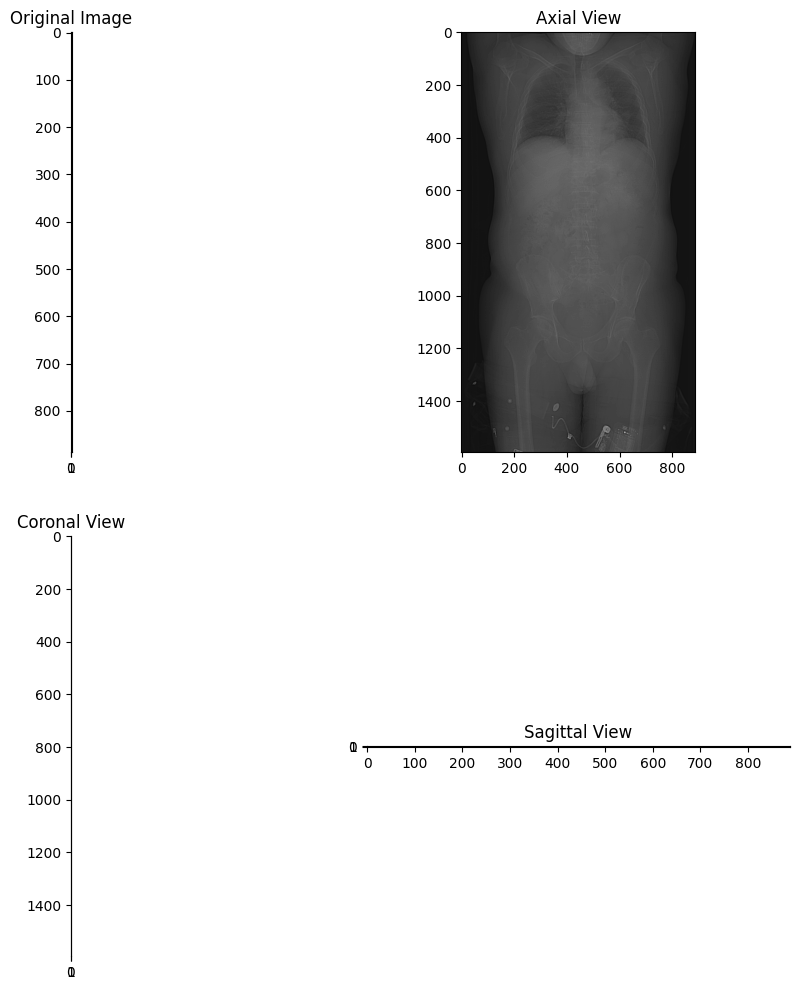

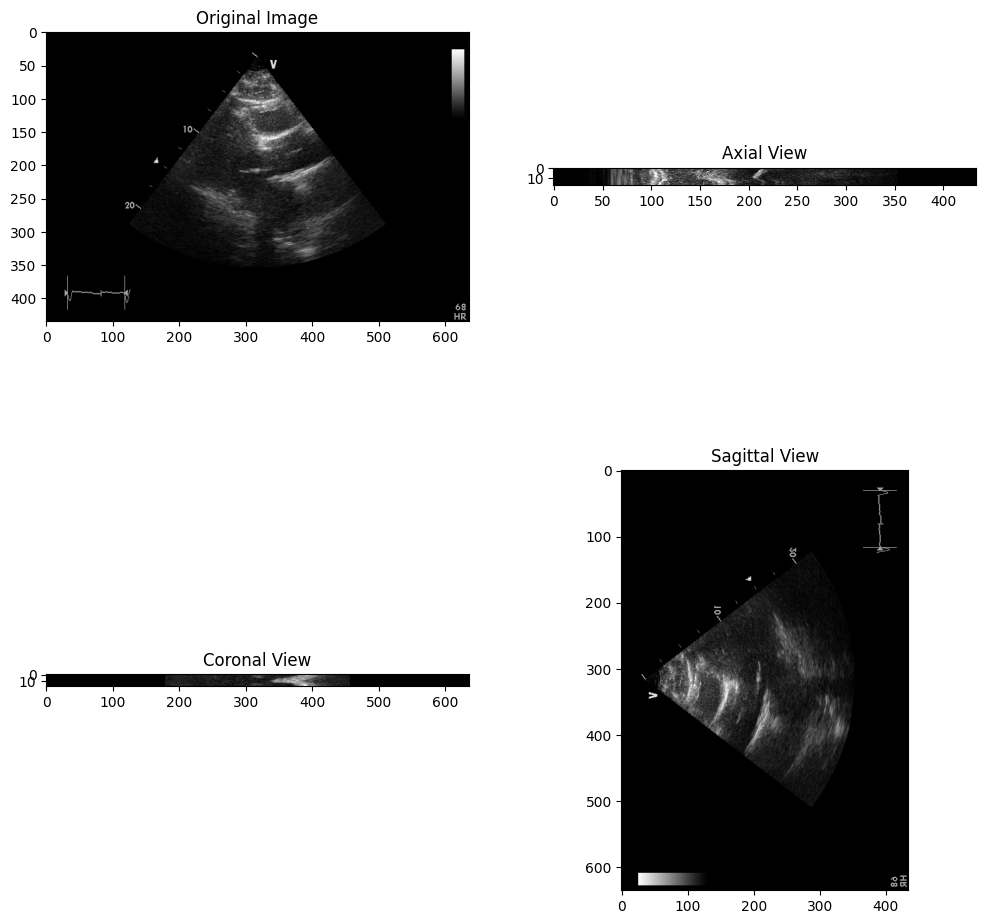

In [6]:
plot_3d_image(rm_imagen)
plot_3d_image(tc_imagen)
plot_3d_image(us_imagen)

### aplicación de filtros

In [7]:

def apply_filters(image_array):
    # Convert numpy array to SimpleITK image
    image = sitk.GetImageFromArray(image_array)
    
    # Apply filters
    mean_filter = sitk.MeanImageFilter()
    mean_image = mean_filter.Execute(image)
    
    median_filter = sitk.MedianImageFilter()
    median_image = median_filter.Execute(image)
    
    gradient_filter = sitk.GradientMagnitudeImageFilter()
    gradient_image = gradient_filter.Execute(image)
    
    curvature_filter = sitk.CurvatureFlowImageFilter()
    curvature_image = curvature_filter.Execute(image)
    
    otsu_filter = sitk.OtsuThresholdImageFilter()
    otsu_image = otsu_filter.Execute(image)
    
    # Convert SimpleITK images to numpy arrays
    mean_array = sitk.GetArrayFromImage(mean_image)
    median_array = sitk.GetArrayFromImage(median_image)
    gradient_array = sitk.GetArrayFromImage(gradient_image)
    curvature_array = sitk.GetArrayFromImage(curvature_image)
    otsu_array = sitk.GetArrayFromImage(otsu_image)
    
    # Plot the results
    fig, axes = plt.subplots(2, 3, figsize=(12, 8))
    ax = axes.ravel()

    ax[0].imshow(image_array, cmap=plt.cm.gray)
    ax[0].set_title('Original')

    ax[1].imshow(mean_array, cmap=plt.cm.gray)
    ax[1].set_title('Mean Filter')

    ax[2].imshow(median_array, cmap=plt.cm.gray)
    ax[2].set_title('Median Filter')

    ax[3].imshow(gradient_array, cmap=plt.cm.gray)
    ax[3].set_title('Gradient Magnitude Filter')

    ax[4].imshow(curvature_array, cmap=plt.cm.gray)
    ax[4].set_title('Curvature Flow Filter')

    ax[5].imshow(otsu_array, cmap=plt.cm.gray)
    ax[5].set_title('Otsu Threshold Filter')

    for a in ax:
        a.axis('off')

    plt.tight_layout()
    plt.show()
    
    # Return the filtered arrays
    return mean_array, median_array, gradient_array, curvature_array, otsu_array


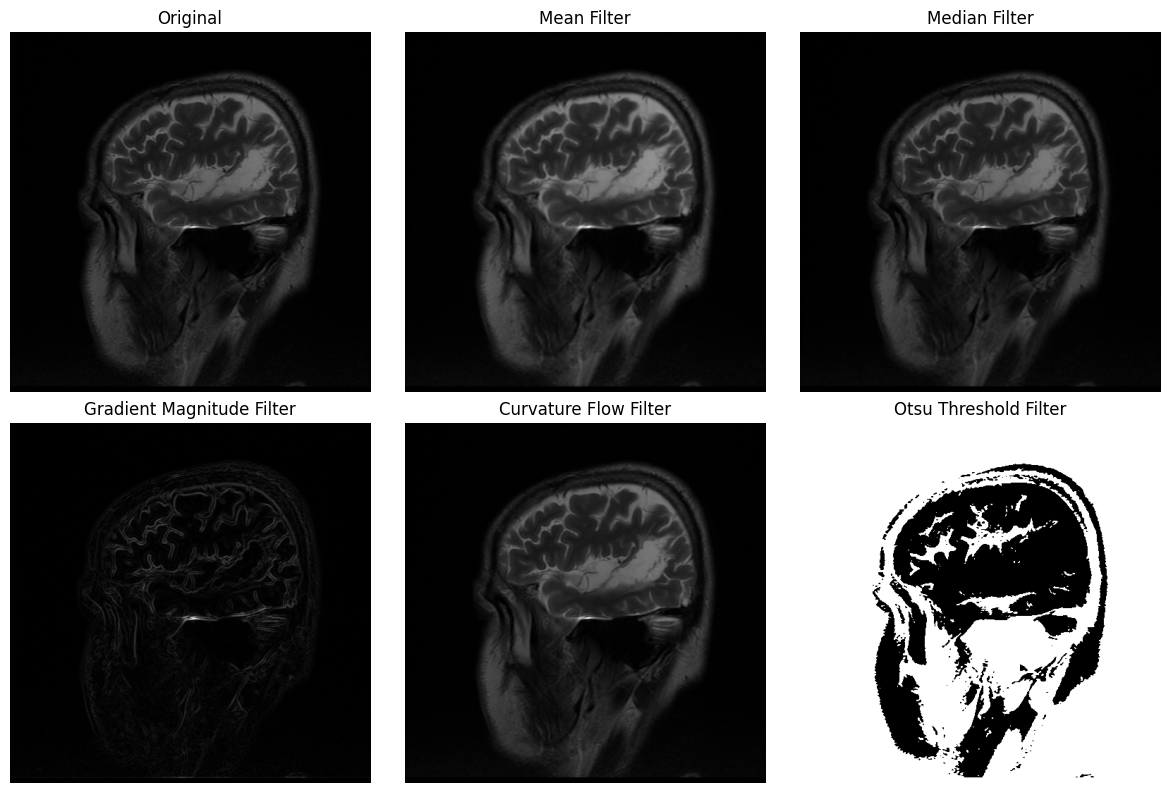

(array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=int16),
 array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 1, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=int16),
 array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.5       , 0.        ,
         0.        ],
        [0.5       , 0.        , 0.5       , ..., 1.118034  , 0.70710677,
         0.5       ],
        ...,
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.   

In [8]:
apply_filters(rm_imagen[:, :, int(rm_imagen.shape[2] / 2)])

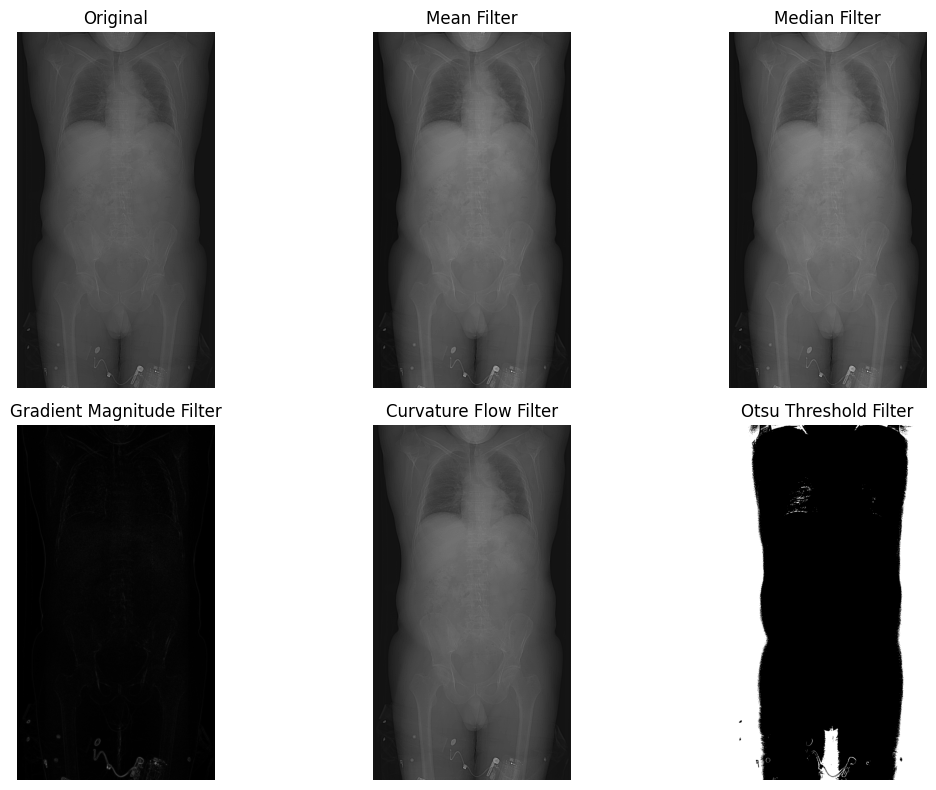

(array([[618, 617, 615, ..., 676, 661, 655],
        [617, 616, 615, ..., 676, 661, 655],
        [616, 616, 615, ..., 676, 662, 655],
        ...,
        [617, 618, 621, ..., 638, 630, 629],
        [619, 620, 622, ..., 638, 631, 630],
        [618, 619, 622, ..., 638, 632, 632]], dtype=int16),
 array([[618, 618, 616, ..., 671, 659, 654],
        [618, 617, 616, ..., 671, 659, 654],
        [615, 615, 615, ..., 672, 660, 655],
        ...,
        [618, 618, 621, ..., 635, 630, 629],
        [619, 620, 621, ..., 635, 632, 629],
        [619, 619, 621, ..., 635, 634, 635]], dtype=int16),
 array([[ 0.70710677,  1.5       ,  3.        , ..., 17.67767   ,
          8.514693  ,  2.6925824 ],
        [ 2.        ,  1.8027756 ,  2.5495098 , ..., 20.5       ,
         12.        ,  4.        ],
        [ 1.5       ,  1.8027756 ,  0.70710677, ..., 17.613914  ,
          8.5       ,  2.9154758 ],
        ...,
        [ 1.5811388 ,  1.8027756 ,  3.8078866 , ..., 10.440307  ,
          3.6055512

In [9]:
apply_filters(tc_imagen[:, :, int(tc_imagen.shape[2] / 2)])

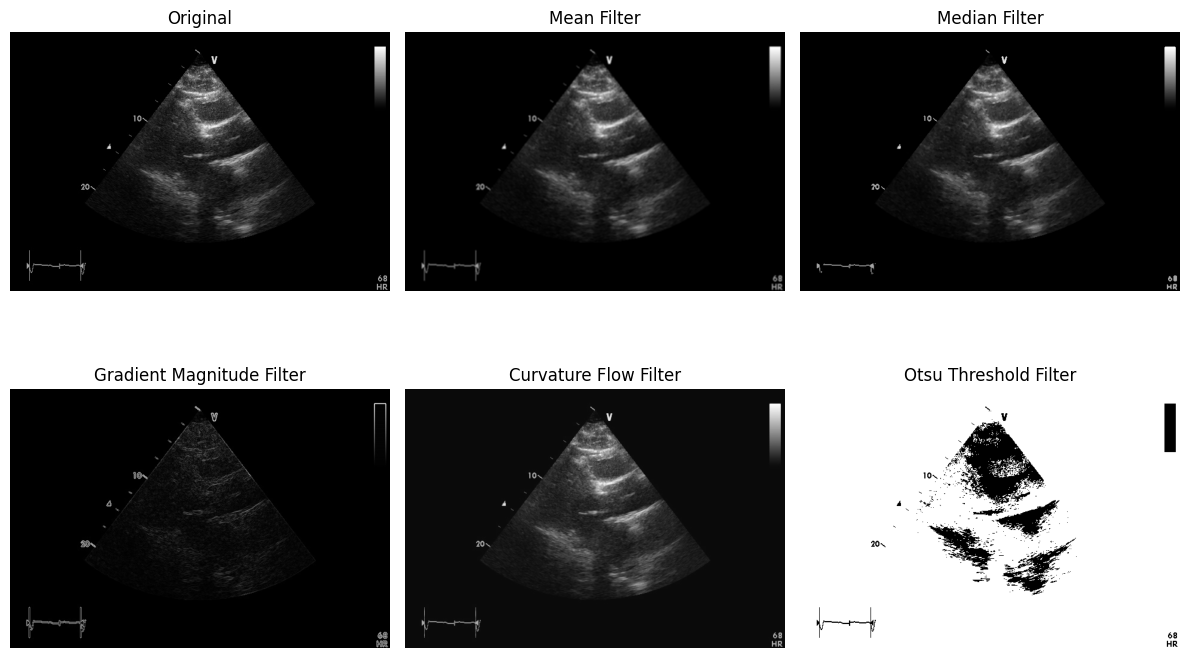

(array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]], dtype=float32),
 array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([[1, 1, 1, ..., 1, 1, 1],
  

In [10]:
apply_filters(us_imagen[int(us_imagen.shape[0] / 2), :, :])